# Pandas 데이터 요약

****

**발표자**  
DSC 박소희

**내용**  
1. 기초 통계 계산
2. 데이터 그룹화 (groupby)
3. 데이터 재구조화 (pivot과 melt)
4. 시각화

**데이터 셋**  
gapminder.tsv, scientists.csv, pew.csv

In [5]:
import pandas as pd
pd.__version__

'2.0.0'

# 데이터 불러오기 

****

**1. 로컬에 저장된 gapminder.csv 파일을 불러와 변수 gapminder로 지정해주세요.**

In [2]:
# 아래에 코드를 작성 후 실행해 보세요.


**2. 로컬에 저장된 scientists.csv 파일을 불러와 변수 scientists로 지정해주세요.**
* 필요에 따라서 delimiter 옵션을 사용합니다.
* index_col은 0번째 열로 선택해주세요.

In [3]:
# 아래에 코드를 작성 후 실행해 보세요.


### Answer

In [6]:
# Example code
gapminder = pd.read_table('../datafile/gapminder.tsv')
scientists = pd.read_table('../datafile/scientists.csv', index_col=0)

In [4]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


# 기초 통계 계산

****

## DataFrame

```python
DataFrame.describe(percentiles=None, include=None, exclude=None)
```

In [5]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


## Series

### 수치형 기술 통계

In [23]:
gapminder['lifeExp']

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1699    62.351
1700    60.377
1701    46.809
1702    39.989
1703    43.487
Name: lifeExp, Length: 1704, dtype: float64

In [8]:
print(f'lifeExp mean: {gapminder['lifeExp'].mean()}')
print(gapminder['lifeExp'].min())
print(gapminder['lifeExp'].max())
print(gapminder['lifeExp'].std())

SyntaxError: f-string: unmatched '[' (658335603.py, line 1)

### 범주형 기술 통계

In [10]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [9]:
gapminder['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [10]:
gapminder['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

# 데이터 그룹화 (groupby)

****

**목적**: 데이터프레임을 특정 열을 기준으로 그룹화하여 그룹 단위로 연산을 수행합니다.  
**사용 사례**: 그룹화된 데이터에 대한 통계 또는 집계 연산을 수행할 때 사용됩니다. 예를 들어, 각 그룹에 대한 평균, 합계, 카운트 등을 계산할 수 있습니다.  

**집계함수 종류** : mean(), min(), max(), nunique(), value_counts(), count()
```python
DataFrame.groupby(by=None, axis=_NoDefault.no_default, sort=True, group_keys=True, dropna=True)
```
`dropna` 매개변수를 설정하여 그룹에 NA를 포함할지 여부를 선택할 수 있습니다. (기본 설정은 True 입니다.)

```python
데이터프레임.groupby('그룹화하고싶은열')['계산하고싶은열'].집계함수()
데이터프레임.groupby(['그룹화하고싶은열1','그룹화하고싶은열2'])[['계산하고싶은열1','계산하고싶은열1']].집계함수()
데이터프레임.groupby('그룹화하고싶은열').agg()
데이터프레임.groupby('그룹화하고싶은열').apply(lambda x: x)
```

## 그룹화한 데이터의 평균 구하기

In [11]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


**1. year에 따른 lifeExp의 평균값을 구하세요.**

In [12]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

**2. year과 continent에 따른 lifeExp와 gdpPercap의 평균값을 구하세요.**

In [13]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

### Answer

In [4]:
# Example code (1)
gapminder.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [5]:
# Example code (2)
gapminder.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

## 그룹화한 데이터 개수 세기

**1. countinent별 속한 country의 행의 개수를 구하세요**

In [14]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.groupby('continent')['country'].count()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

**2. continent에서 country의 데이터 개수를 출력하세요**

In [15]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: country, Length: 142, dtype: int64

**3. continent별로 고유한 country의 수를 구하시오**

In [16]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

### Answers

In [20]:
# Example code (1)
gapminder.groupby('continent')['country'].count()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

In [21]:
# Example code (2)
gapminder.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: country, Length: 142, dtype: int64

In [25]:
# Example code (3)
gapminder.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

## 다중 통계량 구하기

**1. year별 lifeExp의 평균값과 분산값을 구하세요**

In [17]:
# 아래에 코드를 작성 후 실행해 보세요.
# gapminder.groupby('year')['lifeExp'].mean()

gapminder.groupby('year')['lifeExp'].agg(['mean','var'])

,mean,var
year,,
1952,49.057620,149.473995
1957,51.507401,149.604360
1962,53.609249,146.343337
1967,55.678290,137.331628
1972,57.647386,129.548857
1977,59.570157,126.050680
1982,61.533197,116.006208
1987,63.212613,111.435157
1992,64.160338,126.054051


### Answer

In [24]:
gapminder.groupby('year')['lifeExp'].agg(['mean','var'])

,mean,var
year,,
1952,49.057620,149.473995
1957,51.507401,149.604360
1962,53.609249,146.343337
1967,55.678290,137.331628
1972,57.647386,129.548857
1977,59.570157,126.050680
1982,61.533197,116.006208
1987,63.212613,111.435157
1992,64.160338,126.054051


## Apply로 사용자 정의 함수를 적용하기 

In [18]:
def get_top5(x):
    return x.sort_values('lifeExp').head()

In [19]:
gapminder.groupby('country').apply(get_top5)

country continent  year  lifeExp       pop   gdpPercap
country                                                                     
Afghanistan 0     Afghanistan      Asia  1952   28.801   8425333  779.445314
            1     Afghanistan      Asia  1957   30.332   9240934  820.853030
            2     Afghanistan      Asia  1962   31.997  10267083  853.100710
            3     Afghanistan      Asia  1967   34.020  11537966  836.197138
            4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...                       ...       ...   ...      ...       ...         ...
Zimbabwe    1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
            1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298
            1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
            1692     Zimbabwe    Africa  1952   48.451   3080907  406.884115
            1693     Zimbabwe    Africa  1957   50.469   3646340  518.764268

[710 rows x 6 columns]

# 데이터의 재구조화

****

## Pivot

**목적:** 데이터를 편하게 보기 위해 사용!   
**사용 사례:** 데이터의 column을 index, columns, values로 설정하여 데이터를 펼칠 수 있습니다.  

```python
data.pivot(index, columns, values)
pd.pivot_table(data, index, columns, values, aggfunc)
```

`index`: Index로 보낼 column (index를 설정하지 않으면 기존 index로 정해짐)  
`columns`: columns 값으로 보낼 column  
`values`: value 값으로 보낼 column

**1. gapminder 데이터에서  'continent'와 'country'에 따른 각 연도별 'lifeExp' 값을 가지는 데이터프레임을 생성해보세요.**

In [20]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [22]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.pivot(index=['continent','country'], columns='year', values='lifeExp')

year                        1952    1957    1962    1967    1972    1977  \
continent country                                                          
Africa    Algeria         43.077  45.685  48.303  51.407  54.518  58.014   
          Angola          30.015  31.999  34.000  35.985  37.928  39.483   
          Benin           38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana        47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso    31.975  34.906  37.814  40.697  43.591  46.137   
...                          ...     ...     ...     ...     ...     ...   
Europe    Switzerland     69.620  70.560  71.320  72.770  73.780  75.390   
          Turkey          43.585  48.079  52.098  54.336  57.005  59.507   
          United Kingdom  69.180  70.420  70.760  71.360  72.010  72.760   
Oceania   Australia       69.120  70.330  70.930  71.100  71.930  73.490   
          New Zealand     69.390  70.260  71.240  71.520  71.890  72.220   

year                        1982    1987    1992    1997    2002    2007  
continent country                                                         
Africa    Algeria         61.368  65.799  67.744  69.152  70.994  72.301  
          Angola          39.942  39.906  40.647  40.963  41.003  42.731  
          Benin           50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana        61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso    48.122  49.557  50.260  50.324  50.650  52.295  
...                          ...     ...     ...     ...     ...     ...  
Europe    Switzerland     76.210  77.410  78.030  79.370  80.620  81.701  
          Turkey          61.036  63.108  66.146  68.835  70.845  71.777  
          United Kingdom  74.040  75.007  76.420  77.218  78.471  79.425  
Oceania   Australia       74.740  76.320  77.560  78.830  80.370  81.235  
          New Zealand     73.840  74.320  76.330  77.550  79.110  80.204  

[142 rows x 12 columns]

**2. gapminder 데이터에서 'year'에 따른 대륙과 나라의 'lifeExp' 값을 가지는 데이터프레임을 생성해보세요.**

In [23]:
# 아래에 코드를 작성 후 실행해 보세요.
gapminder.pivot(index='year', columns=['continent','country'], values=['lifeExp'])

lifeExp                                                      \
continent        Asia  Europe  Africa          Americas   Oceania  Europe   
country   Afghanistan Albania Algeria  Angola Argentina Australia Austria   
0              28.801   55.23  43.077  30.015    62.485     69.12   66.80   
1              30.332   59.28  45.685  31.999    64.399     70.33   67.48   
2              31.997   64.82  48.303  34.000    65.142     70.93   69.54   
3              34.020   66.22  51.407  35.985    65.634     71.10   70.14   
4              36.088   67.69  54.518  37.928    67.065     71.93   70.63   

                                      ...                         \
continent    Asia             Europe  ...  Africa         Europe   
country   Bahrain Bangladesh Belgium  ...  Uganda United Kingdom   
0          50.939     37.484   68.00  ...  39.978          69.18   
1          53.832     39.348   69.24  ...  42.571          70.42   
2          56.923     41.216   70.25  ...  45.344          70.76   
3          59.923     43.453   70.94  ...  48.051          71.36   
4          63.300     45.252   71.44  ...  51.016          72.01   

                                                                      \
continent      Americas                      Asia                      
country   United States Uruguay Venezuela Vietnam West Bank and Gaza   
0                 68.44  66.071    55.088  40.412             43.160   
1                 69.49  67.044    57.907  42.887             45.671   
2                 70.21  68.253    60.770  45.363             48.127   
3                 70.76  68.468    63.479  47.838             51.631   
4                 71.34  68.673    65.712  50.254             56.532   

                                        
continent              Africa           
country   Yemen, Rep.  Zambia Zimbabwe  
0              32.548  42.038   48.451  
1              33.970  44.077   50.469  
2              35.180  46.023   52.358  
3              36.984  47.768   53.995  
4              39.848  50.107   55.635  

[5 rows x 142 columns]

### Answer

In [14]:
# Example code (1)
gapminder.pivot(index=['continent','country'], columns='year', values=['lifeExp'])

lifeExp                                          \
year                        1952    1957    1962    1967    1972    1977   
continent country                                                          
Africa    Algeria         43.077  45.685  48.303  51.407  54.518  58.014   
          Angola          30.015  31.999  34.000  35.985  37.928  39.483   
          Benin           38.223  40.358  42.618  44.885  47.014  49.190   
          Botswana        47.622  49.618  51.520  53.298  56.024  59.319   
          Burkina Faso    31.975  34.906  37.814  40.697  43.591  46.137   
...                          ...     ...     ...     ...     ...     ...   
Europe    Switzerland     69.620  70.560  71.320  72.770  73.780  75.390   
          Turkey          43.585  48.079  52.098  54.336  57.005  59.507   
          United Kingdom  69.180  70.420  70.760  71.360  72.010  72.760   
Oceania   Australia       69.120  70.330  70.930  71.100  71.930  73.490   
          New Zealand     69.390  70.260  71.240  71.520  71.890  72.220   

                                                                          
year                        1982    1987    1992    1997    2002    2007  
continent country                                                         
Africa    Algeria         61.368  65.799  67.744  69.152  70.994  72.301  
          Angola          39.942  39.906  40.647  40.963  41.003  42.731  
          Benin           50.904  52.337  53.919  54.777  54.406  56.728  
          Botswana        61.484  63.622  62.745  52.556  46.634  50.728  
          Burkina Faso    48.122  49.557  50.260  50.324  50.650  52.295  
...                          ...     ...     ...     ...     ...     ...  
Europe    Switzerland     76.210  77.410  78.030  79.370  80.620  81.701  
          Turkey          61.036  63.108  66.146  68.835  70.845  71.777  
          United Kingdom  74.040  75.007  76.420  77.218  78.471  79.425  
Oceania   Australia       74.740  76.320  77.560  78.830  80.370  81.235  
          New Zealand     73.840  74.320  76.330  77.550  79.110  80.204  

[142 rows x 12 columns]

In [24]:
gapminder.pivot(index=['continent','country'], columns='year', values=['lifeExp']).reset_index(drop=True).head(5)

lifeExp                                                                  \
year    1952    1957    1962    1967    1972    1977    1982    1987    1992   
0     43.077  45.685  48.303  51.407  54.518  58.014  61.368  65.799  67.744   
1     30.015  31.999  34.000  35.985  37.928  39.483  39.942  39.906  40.647   
2     38.223  40.358  42.618  44.885  47.014  49.190  50.904  52.337  53.919   
3     47.622  49.618  51.520  53.298  56.024  59.319  61.484  63.622  62.745   
4     31.975  34.906  37.814  40.697  43.591  46.137  48.122  49.557  50.260   

                              
year    1997    2002    2007  
0     69.152  70.994  72.301  
1     40.963  41.003  42.731  
2     54.777  54.406  56.728  
3     52.556  46.634  50.728  
4     50.324  50.650  52.295

In [23]:
# Example code (2)
gapminder.pivot(index='year', columns=['continent','country'], values=['lifeExp'])

lifeExp                                                      \
continent        Asia  Europe  Africa          Americas   Oceania  Europe   
country   Afghanistan Albania Algeria  Angola Argentina Australia Austria   
year                                                                        
1952           28.801  55.230  43.077  30.015    62.485    69.120  66.800   
1957           30.332  59.280  45.685  31.999    64.399    70.330  67.480   
1962           31.997  64.820  48.303  34.000    65.142    70.930  69.540   
1967           34.020  66.220  51.407  35.985    65.634    71.100  70.140   
1972           36.088  67.690  54.518  37.928    67.065    71.930  70.630   
1977           38.438  68.930  58.014  39.483    68.481    73.490  72.170   
1982           39.854  70.420  61.368  39.942    69.942    74.740  73.180   
1987           40.822  72.000  65.799  39.906    70.774    76.320  74.940   
1992           41.674  71.581  67.744  40.647    71.868    77.560  76.040   
1997           41.763  72.950  69.152  40.963    73.275    78.830  77.510   
2002           42.129  75.651  70.994  41.003    74.340    80.370  78.980   
2007           43.828  76.423  72.301  42.731    75.320    81.235  79.829   

                                      ...                         \
continent    Asia             Europe  ...  Africa         Europe   
country   Bahrain Bangladesh Belgium  ...  Uganda United Kingdom   
year                                  ...                          
1952       50.939     37.484  68.000  ...  39.978         69.180   
1957       53.832     39.348  69.240  ...  42.571         70.420   
1962       56.923     41.216  70.250  ...  45.344         70.760   
1967       59.923     43.453  70.940  ...  48.051         71.360   
1972       63.300     45.252  71.440  ...  51.016         72.010   
1977       65.593     46.923  72.800  ...  50.350         72.760   
1982       69.052     50.009  73.930  ...  49.849         74.040   
1987       70.750     52.819  75.350  ...  51.509         75.007   
1992       72.601     56.018  76.460  ...  48.825         76.420   
1997       73.925     59.412  77.530  ...  44.578         77.218   
2002       74.795     62.013  78.320  ...  47.813         78.471   
2007       75.635     64.062  79.441  ...  51.542         79.425   

                                                                      \
continent      Americas                      Asia                      
country   United States Uruguay Venezuela Vietnam West Bank and Gaza   
year                                                                   
1952             68.440  66.071    55.088  40.412             43.160   
1957             69.490  67.044    57.907  42.887             45.671   
1962             70.210  68.253    60.770  45.363             48.127   
1967             70.760  68.468    63.479  47.838             51.631   
1972             71.340  68.673    65.712  50.254             56.532   
1977             73.380  69.481    67.456  55.764             60.765   
1982             74.650  70.805    68.557  58.816             64.406   
1987             75.020  71.918    70.190  62.820             67.046   
1992             76.090  72.752    71.150  67.662             69.718   
1997             76.810  74.223    72.146  70.672             71.096   
2002             77.310  75.307    72.766  73.017             72.370   
2007             78.242  76.384    73.747  74.249             73.422   

                                        
continent              Africa           
country   Yemen, Rep.  Zambia Zimbabwe  
year                                    
1952           32.548  42.038   48.451  
1957           33.970  44.077   50.469  
1962           35.180  46.023   52.358  
1967           36.984  47.768   53.995  
1972           39.848  50.107   55.635  
1977           44.175  51.386   57.674  
1982           49.113  51.821   60.363  
1987           52.922  50.821   62.351  
1992           55.599  46.100   60.377  
1997  

In [30]:
gapminder.pivot(index='year', columns=['continent','country'], values=['lifeExp']).head(5)

lifeExp                                                      \
continent        Asia  Europe  Africa          Americas   Oceania  Europe   
country   Afghanistan Albania Algeria  Angola Argentina Australia Austria   
year                                                                        
1952           28.801   55.23  43.077  30.015    62.485     69.12   66.80   
1957           30.332   59.28  45.685  31.999    64.399     70.33   67.48   
1962           31.997   64.82  48.303  34.000    65.142     70.93   69.54   
1967           34.020   66.22  51.407  35.985    65.634     71.10   70.14   
1972           36.088   67.69  54.518  37.928    67.065     71.93   70.63   

                                      ...                         \
continent    Asia             Europe  ...  Africa         Europe   
country   Bahrain Bangladesh Belgium  ...  Uganda United Kingdom   
year                                  ...                          
1952       50.939     37.484   68.00  ...  39.978          69.18   
1957       53.832     39.348   69.24  ...  42.571          70.42   
1962       56.923     41.216   70.25  ...  45.344          70.76   
1967       59.923     43.453   70.94  ...  48.051          71.36   
1972       63.300     45.252   71.44  ...  51.016          72.01   

                                                                      \
continent      Americas                      Asia                      
country   United States Uruguay Venezuela Vietnam West Bank and Gaza   
year                                                                   
1952              68.44  66.071    55.088  40.412             43.160   
1957              69.49  67.044    57.907  42.887             45.671   
1962              70.21  68.253    60.770  45.363             48.127   
1967              70.76  68.468    63.479  47.838             51.631   
1972              71.34  68.673    65.712  50.254             56.532   

                                        
continent              Africa           
country   Yemen, Rep.  Zambia Zimbabwe  
year                                    
1952           32.548  42.038   48.451  
1957           33.970  44.077   50.469  
1962           35.180  46.023   52.358  
1967           36.984  47.768   53.995  
1972           39.848  50.107   55.635  

[5 rows x 142 columns]

## Melt
**목적**: DataFrame의 형태를 변경하여 'wide' 형식을 'long' 형식으로 변환합니다.  
**사용 사례**: 열 이름이 변수를 나타내고 열 값이 해당 변수의 관측치를 나타낼 때 사용됩니다. 주로 데이터 정리 및 시각화에 유용합니다.

```python
pd.melt(data, id_vars, var_name, value_name)
```
`data`: melt를 진행할 DataFrame 지정  
`id_vars`: 위치를 그대로 유지할 column의 이름을 지정 (None이면 id_vars를 뺀 나머지 column으로 자동 지정)  
`var_name`: unpivot할 column 이름 지정 (None이면 variable을 이름으로 함)  
`value_name`: value column 이름 지정 (None이면 value로 지정됨)

In [25]:
pew = pd.read_csv('../datafile/pew.csv')
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


**1. 11개의 소득정보 열을 행으로 옮기려고 합니다. religion 열을 고정해서 pivot 해보세요**

In [26]:
# 아래에 코드를 작성 후 실행해 보세요.
pew.melt(id_vars='religion')

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


**2. pivoting 된 var 열의 이름과 value 열의 이름을 melt 함수에서 변경해보세요**

In [27]:
# 아래에 코드를 작성 후 실행해 보세요.
pew.melt(id_vars='religion', var_name='my_var', value_name='my_value')

,religion,my_var,my_value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


### Answer

In [21]:
# Example code (1)
pd.melt(pew, id_vars = 'religion')

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [22]:
# Example code (2)
pd.melt(pew, id_vars = 'religion', var_name = 'income', value_name = 'count')

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


# 시각화

****

## Bar plot
* 범주형 변수 1개와 숫자형 변수 1개를 시각화할 때 쓰임

**한국에서 년도별 인구수**

In [36]:
gapminder['country'].unique()[:20]

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon'],
      dtype=object)

In [28]:
kor_df = gapminder[gapminder['country']=='Korea, Rep.']

<Axes: xlabel='year'>

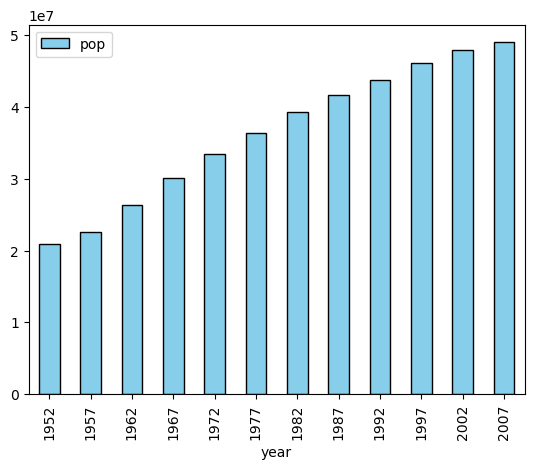

In [4]:
kor_df.plot(x='year', y='pop', kind='bar', color='skyblue', edgecolor='black')

## 히스토그램
* 숫자형 변수 1개를 시각화할 때 쓰임

**기대수명의 분포**

<Axes: ylabel='Frequency'>

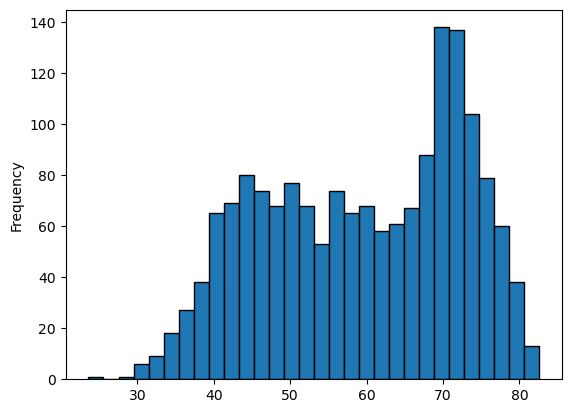

In [5]:
gapminder['lifeExp'].plot(kind='hist', bins=30, edgecolor='black')

## 박스플롯
* 숫자형 변수를 시각화할 때 쓰임

**대륙별 기대수명의 분포의 비교**

lifeExp    Axes(0.125,0.11;0.775x0.77)
dtype: object

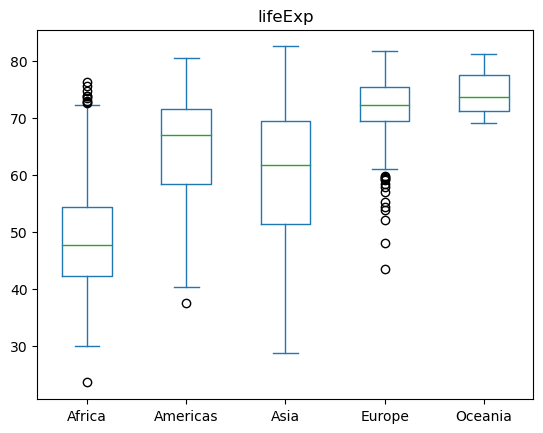

In [6]:
gapminder.plot(kind='box', column='lifeExp', by='continent')

## Scatter plot
* 숫자형 변수가 2개를 시각화할 때 쓰임

**1인당 국민 소득과 기대수명의 관계**

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

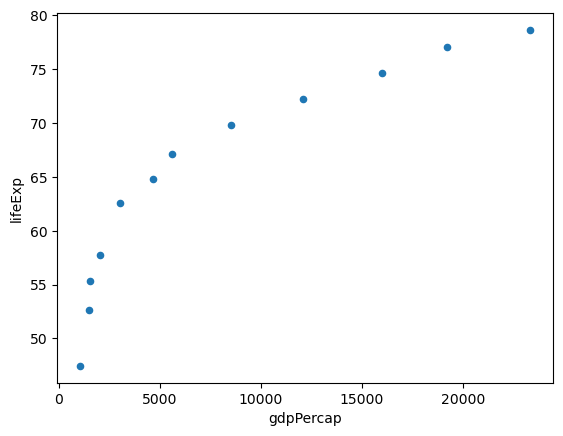

In [71]:
gapminder.plot(x='gdpPercap', y='lifeExp', kind='scatter')

In [30]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [32]:
gapminder['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba